In [1]:
import numpy as np
import pandas as pd
import keras

from keras.datasets import cifar10
from keras.models import Sequential
from keras import layers, Model
from keras.optimizers import SGD

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
n_classes = 10

y_train = keras.utils.to_categorical(y_train,n_classes)
y_test = keras.utils.to_categorical(y_test,n_classes)

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
model_accuracies = []

In [ ]:
try:
    model_accuracies = model_accuracies[:1]
except:
    model_accuracies = []

In [27]:
input_layer = layers.Input (shape=(32,32,3))

conv1 = layers.Conv2D (16, (3, 3), activation='relu', padding='same', strides=1)(input_layer)
conv2 = layers.Conv2D (32, (3, 3), activation='relu', padding='same', strides=1)(conv1)
pool1 = layers.MaxPool2D(pool_size=(2, 2))(conv2)

conv3 = layers.Conv2D (32, (3, 3), activation='relu', padding='same', strides=1)(pool1)
conv4 = layers.Conv2D (64, (3, 3), activation='relu', padding='same', strides=1)(conv3)
pool2 = layers.MaxPool2D(pool_size=(2, 2))(conv4)

conv5 = layers.Conv2D (64, (3, 3), activation='relu', padding='same', strides=1)(pool2)
conv6 = layers.Conv2D (128, (3, 3), activation='relu', padding='same', strides=1)(conv5)
pool3 = layers.MaxPool2D(pool_size=(2, 2))(conv6)

# drop1 = layers.Dropout(0.2)(pool3)

flatten = layers.Flatten()(pool3)

fully_connected1 = layers.Dense(300,activation = 'relu')(flatten)
# drop2 = layers.Dropout(0.3)(fully_connected1)
fully_connected2 = layers.Dense(100,activation = 'relu')(fully_connected1)
# drop3 = layers.Dropout(0.3)(fully_connected2)
fully_connected3 = layers.Dense(10,activation = 'softmax')(fully_connected2)

model = Model(input_layer, fully_connected3)

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)          0   

In [28]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
352/352 [==============================] - 11s 29ms/step - loss: 2.6977 - accuracy: 0.3034 - val_loss: 1.3170 - val_accuracy: 0.5290
Epoch 2/50
352/352 [==============================] - 10s 28ms/step - loss: 1.1849 - accuracy: 0.5808 - val_loss: 0.9983 - val_accuracy: 0.6588
Epoch 3/50
352/352 [==============================] - 10s 28ms/step - loss: 0.9315 - accuracy: 0.6729 - val_loss: 0.8702 - val_accuracy: 0.7006
Epoch 4/50
352/352 [==============================] - 10s 28ms/step - loss: 0.7887 - accuracy: 0.7248 - val_loss: 0.8231 - val_accuracy: 0.7184
Epoch 5/50
352/352 [==============================] - 10s 28ms/step - loss: 0.6883 - accuracy: 0.7598 - val_loss: 0.7768 - val_accuracy: 0.7340
Epoch 6/50
352/352 [==============================] - 10s 28ms/step - loss: 0.5771 - accuracy: 0.7969 - val_loss: 0.8112 - val_accuracy: 0.7256
Epoch 7/50
352/352 [==============================] - 10s 28ms/step - loss: 0.5145 - accuracy: 0.8181 - val_loss: 0.7538 - val_accuracy:

In [33]:
len(model_accuracies)

4

In [30]:
model_accuracies.append(history.history['val_accuracy'])

(0.7, 0.78)

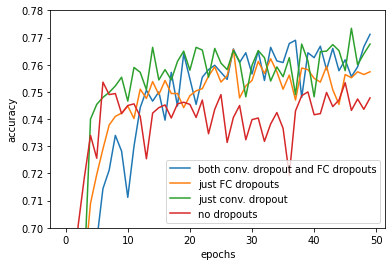

In [39]:
plt.plot(range(50), model_accuracies[0])
plt.plot(range(50), model_accuracies[1])
plt.plot(range(50), model_accuracies[2])
plt.plot(range(50), model_accuracies[3])
plt.legend(['both conv. dropout and FC dropouts', 'just FC dropouts', 'just conv. dropout', 'no dropouts'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.ylim([0.7, 0.78])

In [ ]:
type(x_train)

In [ ]:
selected_samples = np.array([], dtype=int)
for cat in range(10):
    cat_indices = [i for i, y in enumerate(y_train) if  y[cat] == 1]
    remained = np.random.choice(cat_indices, size=600, replace=False)
    selected_samples = np.concatenate((selected_samples, remained))

x_train_ = x_train[selected_samples]
y_train_ = y_train[selected_samples]

In [18]:
def plot_metric(history, metric_name, ax=plt):
    
    ax.plot(history.history[metric_name])
    ax.plot(history.history['val_'+metric_name])
    ax.set_ylabel(metric_name.replace('_', ' '))
    ax.set_xlabel('epoch')
    ax.legend(['train', 'test'], loc='upper left')

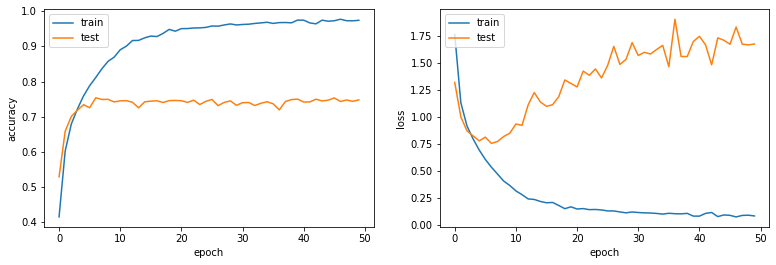

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
plot_metric(history, 'accuracy', ax1)
plot_metric(history, 'loss', ax2)
plt.show()

In [ ]:
len(model_accuracies)

In [35]:
predicted = model.predict(x_test)
predicted = [np.argmax(p) for p in predicted]
y_test_ = [np.argmax(y) for y in y_test]
print(classification_report(y_test_, predicted))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1000
           1       0.83      0.88      0.85      1000
           2       0.61      0.62      0.61      1000
           3       0.57      0.52      0.54      1000
           4       0.73      0.60      0.66      1000
           5       0.67      0.60      0.63      1000
           6       0.71      0.85      0.77      1000
           7       0.75      0.78      0.77      1000
           8       0.80      0.86      0.83      1000
           9       0.85      0.82      0.83      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

